# Automatic Differentiation using TensorFlow

Nell'esempio verrà usato il seguente grafo computazionale, con una funzione $F: \mathbb{R}^3 \to \mathbb{R}^2$ definita come segue: 

$$
F: \mathbb{R}^3 \to \mathbb{R}^2, \quad F(x) = \begin{pmatrix}
\exp(x_1 + x_2) + \sin(x_1 + x_2) \\
x_3^2 \cdot (x_1 + x_2)
\end{pmatrix}
$$

Il grafo computazionale è composto da 9 nodi e 7 archi. I nodi sono numerati in ordine topologico, partendo da $v_{-2}$ fino a $y_2$. I nodi $v_{-2}, v_{-1}, v_0$ sono i nodi di input, mentre i nodi $y_1, y_2$ sono i nodi di output. Gli archi rappresentano le dipendenze tra i nodi.
Può essere descritto nel seguente modo:

$$
\begin{aligned}
v_{-2} &= x_1 \\
v_{-1} &= x_2 \\
v_0 &= x_3 \\
v_1 &= v_{-2} + v_{-1} \\
v_2 &= \exp(v_1) \\
v_3 &= \sin(v_1) \\
v_4 &= v_0^2 \\
v_5 &= v_2 + v_3 \\
v_6 &= v_4 \cdot v_1 \\
y_1 &= v_5 \\
y_2 &= v_6
\end{aligned}
$$

Per facilitare la comprensione del grafo, è possibile fare riferimento alla figura sottostante. Inoltre, per un approfondimento teorico sull'argomento dell'autodifferenziazione e sulle sue applicazioni in TensorFlow, si consiglia di consultare il seguente lavoro: __Gebremedhin, A. H., & Walther, A. (2020). An introduction to algorithmic differentiation. WIREs Data Mining and Knowledge Discovery, 10(1), e1334.__


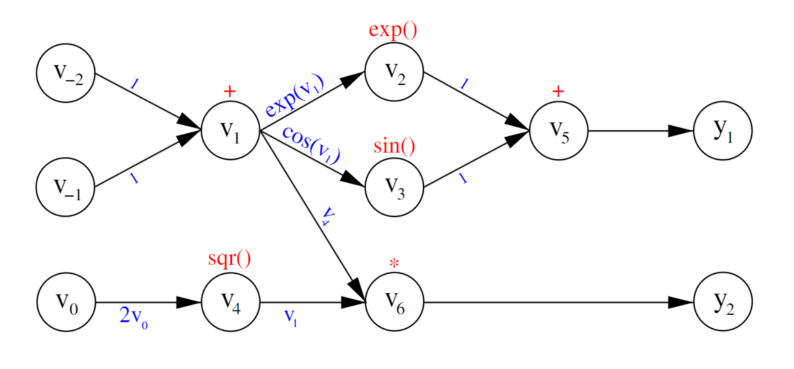

In [1]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

img = mpimg.imread('Figura_ex2.png')

plt.figure(figsize=(10, 5))  

plt.imshow(img)
plt.axis('off')  
plt.show()

## Implementazione in TensorFlow

In [2]:
import sympy as sp # libreria per il calcolo simbolico

def sy_baby_f(x1, x2, x3):
    v1 = x1 + x2
    v2 = sp.exp(v1)
    v3 = sp.sin(v1)
    v4 = x3**2
    v5 = v2 + v3
    v6 = v4 * v1
    y1 = v5
    y2 = v6
    return y1, y2

### Vediamo con Tensorflow.
 Uso il decoratore __@tf.function__ per creare un grafo statico, alterando il meccanismo di calcolo della funzione.
Nel primo stadio viene creato un grafo computazionale e l'esecuzione delle operazione è rimandata a un tempo successivo. Tesnorflow paralellizza e semplfifica alcune operazioni.
Solo nel secondo stadio vengono eseguite le operazioni specificate dal grafo, ma non l'eventuale codice Python che le ha generate.

Questa separazione migliora i tempi di esecuzione, soprattutto nel caso di funzioni con molte chiamate a operazioni elementari. Tensorflow ha delle euristiche interne per decidere quando è conveniente creare un grafo statico.

In [3]:
import tensorflow as tf

@tf.function  # decoratore per creare un grafo statico, altera il meccanismo di calcolo della funzione
def baby_f(x1, x2, x3):
    v1 = x1 + x2
    v2 = tf.exp(v1)
    v3 = tf.sin(v1)
    v4 = x3**2
    v5 = v2 + v3
    v6 = v4 * v1
    y1 = v5
    y2 = v6
    return y1, y2

In [4]:
# dichiaro le variabili

x1 = tf.Variable(1.0, name='x1')
x2 = tf.Variable(2.0, name='x2')
x3 = tf.Variable(3.0, name='x3')

In [8]:
with tf.GradientTape(persistent=True) as tape:
    y1, y2 = baby_f(x1, x2, x3) # calcolo automatico tramite reverse mode
    
# stampo il gradiente
print('=== Automatic derivates ===')
print()
g = tape.gradient(y1, [x1, x2, x3])
print('dy1/dx1:', g[0])
print('dy1/dx2:', g[1])
print('dy1/dx3:', g[2])
print()
g = tape.gradient(y2, [x1, x2, x3])
print('dy2/dx1:', g[0])
print('dy2/dx2:', g[1])
print('dy2/dx3:', g[2])

=== Automatic derivates ===

dy1/dx1: tf.Tensor(19.095545, shape=(), dtype=float32)
dy1/dx2: tf.Tensor(19.095545, shape=(), dtype=float32)
dy1/dx3: tf.Tensor(0.0, shape=(), dtype=float32)

dy2/dx1: tf.Tensor(9.0, shape=(), dtype=float32)
dy2/dx2: tf.Tensor(9.0, shape=(), dtype=float32)
dy2/dx3: tf.Tensor(18.0, shape=(), dtype=float32)


In [11]:
print('=== Symbolic derivates ===')
print()
x1, x2, x3 = sp.symbols('x1 x2 x3')
y1, y2 = sy_baby_f(x1, x2, x3)
dy1_dx1 = sp.diff(y1, x1)
dy1_dx2 = sp.diff(y1, x2)
dy1_dx3 = sp.diff(y1, x3)
dy2_dx1 = sp.diff(y2, x1)
dy2_dx2 = sp.diff(y2, x2)
dy2_dx3 = sp.diff(y2, x3)
print('dy1/dx1:', dy1_dx1)
print('dy1/dx2:', dy1_dx2)
print('dy1/dx3:', dy1_dx3)
print()
print('dy2/dx1:', dy2_dx1)
print('dy2/dx2:', dy2_dx2)
print('dy2/dx3:', dy2_dx3)

# valuto 
print('=== Symbolic derivates (evaluated) ===')
subs = {x1: 1.0, x2: 2.0, x3: 3.0}
print()
print('dy1/dx1:', dy1_dx1.subs(subs))
print('dy1/dx2:', dy1_dx2.subs(subs))
print('dy1/dx3:', dy1_dx3.subs(subs))
print()
print('dy2/dx1:', dy2_dx1.subs(subs))
print('dy2/dx2:', dy2_dx2.subs(subs))
print('dy2/dx3:', dy2_dx3.subs(subs))

=== Symbolic derivates ===

dy1/dx1: exp(x1 + x2) + cos(x1 + x2)
dy1/dx2: exp(x1 + x2) + cos(x1 + x2)
dy1/dx3: 0

dy2/dx1: x3**2
dy2/dx2: x3**2
dy2/dx3: 2*x3*(x1 + x2)
=== Symbolic derivates (evaluated) ===

dy1/dx1: 19.0955444265872
dy1/dx2: 19.0955444265872
dy1/dx3: 0

dy2/dx1: 9.00000000000000
dy2/dx2: 9.00000000000000
dy2/dx3: 18.0000000000000


Così ho dimostrato che il calcolo simbolico e quello automatico sono equivalenti.